In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
from tqdm import tqdm
import statsmodels.api as sm
 
import matplotlib.pyplot as plt 
import plotly.express as px
plt.style.use('ggplot')

In [2]:
df = pd.read_excel(r'./ESG ETFs Data Set.xlsx')
print(df.columns)
df

Index(['Symbol', 'ETF Name', 'ESG Score', 'Asset Class New',
       'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)',
       'Carbon Intensity (Tons of CO2e / $M Sales)',
       'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)',
       '1 Week', '1 Month', 'YTD', '1 Year', '3 Year', '5 Year',
       'Returns Rating', 'ESG Rank', 'Standard Deviation', 'P/E Ratio', 'Beta',
       '5-Day Volatility', '20-Day Volatility', '50-Day Volatility',
       '200-Day Volatility'],
      dtype='object')


,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%),1 Week,...,5 Year,Returns Rating,ESG Rank,Standard Deviation,P/E Ratio,Beta,5-Day Volatility,20-Day Volatility,50-Day Volatility,200-Day Volatility
0,VHT,Vanguard Health Care ETF,10.00,Equity,100.00,100.00,0.03,0.03,13.86,-1.06,...,56.96,B-,1,10.24,27.10,0.81,106.66,22.41,20.79,20.62
1,HEWC,iShares Currency Hedged MSCI Canada ETF,10.00,Equity,100.00,100.00,7.42,7.42,2.40,-0.06,...,34.40,B+,1,1.48,20.88,0.79,26.04,23.86,19.25,18.49
2,EWP,iShares MSCI Spain ETF,10.00,Equity,100.00,100.00,25.21,25.21,4.85,2.69,...,-26.98,B-,1,1.95,18.94,0.95,92.41,36.45,28.74,27.32
3,OUSA,ALPS O'Shares U.S. Quality Dividend ETF,10.00,Equity,100.00,100.00,8.77,8.77,6.57,-0.63,...,37.92,C+,1,2.08,24.50,0.87,148.33,23.55,20.73,19.03
4,EUFN,iShares MSCI Europe Financials ETF,10.00,Equity,100.00,100.00,0.00,0.00,0.82,2.32,...,-23.11,A-,1,1.94,15.95,1.17,112.33,38.75,30.13,30.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,KBWY,Invesco KBW Premium Yield Equity REIT ETF,1.95,Real Estate,1.15,1.49,3.88,3.88,5.63,0.37,...,-27.89,A,4,1.41,9.23,1.30,93.56,36.63,27.56,25.91
903,CHII,Global X MSCI China Industrials ETF,1.75,Equity,9.02,1.15,2.81,2.81,15.47,0.33,...,-18.30,A+,4,1.49,12.67,0.65,24.55,22.96,19.51,21.16
904,CHIM,Global X MSCI China Materials ETF,1.42,Equity,8.91,0.74,0.00,0.00,1.93,-1.31,...,-12.88,B+,4,2.45,14.57,0.94,30.66,28.00,24.85,23.86
905,ASHS,Xtrackers Harvest CSI 500 China A-Shares Small...,1.27,Equity,1.26,0.53,2.85,2.85,4.39,0.39,...,-15.33,C,4,3.81,19.45,0.53,94.13,24.72,22.00,21.59


In [3]:
df = pd.concat([df,pd.get_dummies(df['Asset Class New'])],axis=1)
df = df.drop(['Preferred Stock'],axis=1)
print(df.columns)
df

Index(['Symbol', 'ETF Name', 'ESG Score', 'Asset Class New',
       'ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)',
       'Carbon Intensity (Tons of CO2e / $M Sales)',
       'SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)',
       '1 Week', '1 Month', 'YTD', '1 Year', '3 Year', '5 Year',
       'Returns Rating', 'ESG Rank', 'Standard Deviation', 'P/E Ratio', 'Beta',
       '5-Day Volatility', '20-Day Volatility', '50-Day Volatility',
       '200-Day Volatility', 'Alternatives', 'Bond', 'Equity', 'Multi-Asset',
       'Real Estate'],
      dtype='object')


,Symbol,ETF Name,ESG Score,Asset Class New,ESG Score Peer Percentile (%),ESG Score Global Percentile (%),Carbon Intensity (Tons of CO2e / $M Sales),SRI Exclusion Criteria (%),Sustainable Impact Solutions (%),1 Week,...,Beta,5-Day Volatility,20-Day Volatility,50-Day Volatility,200-Day Volatility,Alternatives,Bond,Equity,Multi-Asset,Real Estate
0,VHT,Vanguard Health Care ETF,10.00,Equity,100.00,100.00,0.03,0.03,13.86,-1.06,...,0.81,106.66,22.41,20.79,20.62,0,0,1,0,0
1,HEWC,iShares Currency Hedged MSCI Canada ETF,10.00,Equity,100.00,100.00,7.42,7.42,2.40,-0.06,...,0.79,26.04,23.86,19.25,18.49,0,0,1,0,0
2,EWP,iShares MSCI Spain ETF,10.00,Equity,100.00,100.00,25.21,25.21,4.85,2.69,...,0.95,92.41,36.45,28.74,27.32,0,0,1,0,0
3,OUSA,ALPS O'Shares U.S. Quality Dividend ETF,10.00,Equity,100.00,100.00,8.77,8.77,6.57,-0.63,...,0.87,148.33,23.55,20.73,19.03,0,0,1,0,0
4,EUFN,iShares MSCI Europe Financials ETF,10.00,Equity,100.00,100.00,0.00,0.00,0.82,2.32,...,1.17,112.33,38.75,30.13,30.32,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,KBWY,Invesco KBW Premium Yield Equity REIT ETF,1.95,Real Estate,1.15,1.49,3.88,3.88,5.63,0.37,...,1.30,93.56,36.63,27.56,25.91,0,0,0,0,1
903,CHII,Global X MSCI China Industrials ETF,1.75,Equity,9.02,1.15,2.81,2.81,15.47,0.33,...,0.65,24.55,22.96,19.51,21.16,0,0,1,0,0
904,CHIM,Global X MSCI China Materials ETF,1.42,Equity,8.91,0.74,0.00,0.00,1.93,-1.31,...,0.94,30.66,28.00,24.85,23.86,0,0,1,0,0
905,ASHS,Xtrackers Harvest CSI 500 China A-Shares Small...,1.27,Equity,1.26,0.53,2.85,2.85,4.39,0.39,...,0.53,94.13,24.72,22.00,21.59,0,0,1,0,0


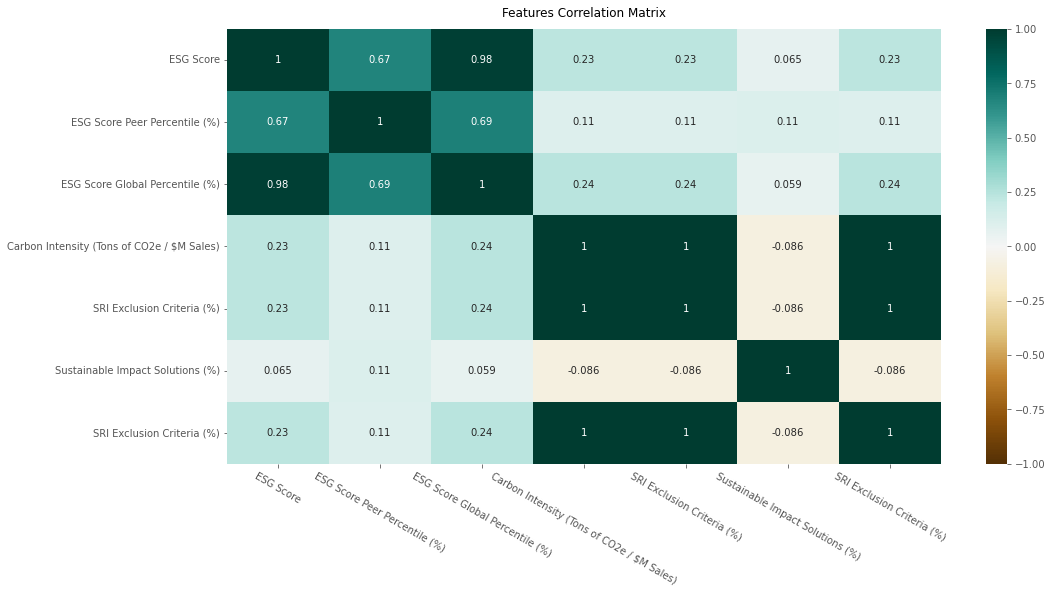

In [6]:
import seaborn as sns 

plt.figure(figsize=(16, 8))
corr = df[['ESG Score','ESG Score Peer Percentile (%)', 'ESG Score Global Percentile (%)',
       'Carbon Intensity (Tons of CO2e / $M Sales)','SRI Exclusion Criteria (%)', 'Sustainable Impact Solutions (%)','SRI Exclusion Criteria (%)']].corr()
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Features Correlation Matrix', fontdict={'fontsize':12}, pad=12) ;
plt.xticks(rotation=-30)
plt.show()

In [7]:
target = '1 Month'

x = df[['ESG Score','Carbon Intensity (Tons of CO2e / $M Sales)','Sustainable Impact Solutions (%)','P/E Ratio', 'Beta','Bond', 'Equity', 'Multi-Asset']]
x = sm.add_constant(x)
y = df[target]

model = sm.OLS(y,x)
res = model.fit()
res.summary()

/Users/chen-lichiang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                1 Month   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     23.00
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           3.45e-32
Time:                        09:54:56   Log-Likelihood:                -2602.2
No. Observations:                 907   AIC:                             5222.
Df Residuals:                     898   BIC:                             5266.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -6.9712      0.986     -7.072      0.000      -8.906      -5.037
ESG Score                                      0.2805      0.086      3.280      0.001       0.113       0.448
Carbon Intensity (Tons of CO2e / $M Sales)    -0.0573      0.017     -3.403      0.001      -0.090      -0.024
Sustainable Impact Solutions (%)              -0.1814      0.020     -9.261      0.000      -0.220      -0.143
P/E Ratio                                     -0.0345      0.008     -4.132      0.000      -0.051      -0.018
Beta                                          -2.5897      0.406     -6.371      0.000      -3.387      -1.792
Bond                                           5.0177      2.591      1.936      0.053      -0.068      10.103
Equity                                         3.7532      0.721      5.207      0.000       2.339       5.168
Multi-Asset                                    4.0421      1.053      3.840      0.000       1.976       6.108
==============================================================================
Omnibus:                      186.946   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4352.935
Skew:                          -0.260   Prob(JB):                         0.00
Kurtosis:                      13.720   Cond. No.                         555.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
target = '20-Day Volatility'

x = df[['ESG Score','Carbon Intensity (Tons of CO2e / $M Sales)','Sustainable Impact Solutions (%)','P/E Ratio', 'Beta','Bond', 'Equity', 'Multi-Asset']]
x = sm.add_constant(x)
y = df[target]

model = sm.OLS(y,x)
res = model.fit()
res.summary()

/Users/chen-lichiang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      20-Day Volatility   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          3.42e-214
Time:                        09:54:57   Log-Likelihood:                -2957.7
No. Observations:                 907   AIC:                             5933.
Df Residuals:                     898   BIC:                             5977.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          9.1303      1.459      6.259      0.000       6.267      11.993
ESG Score                                     -0.2991      0.127     -2.363      0.018      -0.547      -0.051
Carbon Intensity (Tons of CO2e / $M Sales)     0.0988      0.025      3.965      0.000       0.050       0.148
Sustainable Impact Solutions (%)               0.0652      0.029      2.248      0.025       0.008       0.122
P/E Ratio                                      0.0406      0.012      3.285      0.001       0.016       0.065
Beta                                          24.5826      0.602     40.868      0.000      23.402      25.763
Bond                                          -7.0428      3.834     -1.837      0.067     -14.568       0.483
Equity                                        -3.4625      1.067     -3.246      0.001      -5.556      -1.369
Multi-Asset                                   -6.6516      1.558     -4.270      0.000      -9.709      -3.595
==============================================================================
Omnibus:                      417.755   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.911
Skew:                           1.950   Prob(JB):                         0.00
Kurtosis:                      11.197   Cond. No.                         555.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""